Phys281_Hw2 Created on Thursday Oct. 11 2018 Created by Xiaocheng Chen

Identify the problem: I will use Python in this problem set. The goal is to create a model of atmospheric carbon dioxide based on collected data from NOAA. First, read data from text files and plot the data with uncertainty. Then perform linear and non-linear least-squares fitting. Finally, find the best fit to develop a model that predicts the future level of atmospheric $CO_2$. 

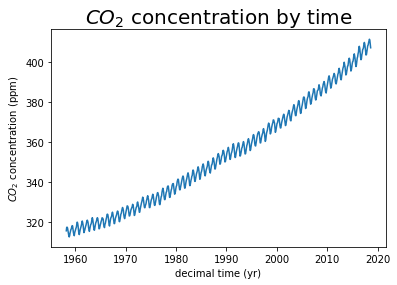

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, exp, pi, sqrt


data = np.loadtxt('co2_data.txt', float) # read the data from text file
t = data[:,2]                            # take the third column for time
y = data[:,4]                            # take the fifth column for concentration

plt.plot(t,y)
plt.xlabel('decimal time (yr)')
plt.ylabel('$CO_2$ concentration (ppm)')
plt.title('$CO_2$ concentration by time',fontsize=20);

For Part 1, I read the data from text file and plot it. According to the graph I get, I think the amplitude of the oscillation should be approximately 2.5 ppm.

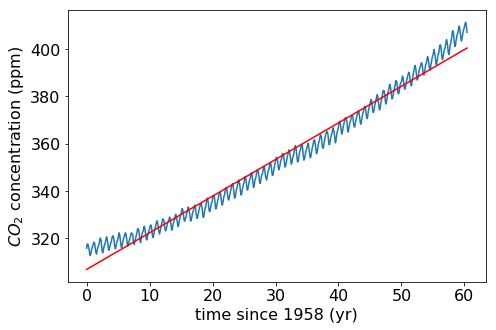

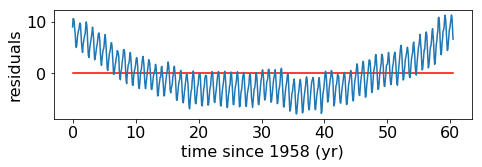

chi-squared = 16.964396838548144
parameters and uncertainties:
Intercept of the curve: p0 = 306.757582 +/- 0.610824 (ppm)
Slope of the curve: p1 = 1.549587 +/- 0.017505 (ppm/yr)


In [4]:
from scipy.optimize import curve_fit
from scipy import linalg


x = t - np.array([t[0]]*len(t))     # create a new array of "time since 1958"
sig = [1]*len(x)
nn = len(x)                       

# plot the linear fit curve
def f(x,p0,p1):                     # linear fitting model
    return p0 + p1*x
pp = 2                              # number of parameters

guesses = (1,1)   
(p0,p1),cc = curve_fit(f,x,y,p0=guesses,sigma=sig) 
(up0,up1) = 2*sqrt(np.diag(cc))

yfit = f(x,p0,p1)
yys = (yfit-y)**2
chisqr = sum(yys)/(nn-pp)               

xmod = np.linspace(x[0],x[-1],100)      
ymod = f(xmod,p0,p1)
plt.figure(figsize=(7.5,5))
plt.rc('font', size=16)
plt.plot(x,y)
plt.plot(xmod,ymod,'r')                  
plt.xlabel('time since 1958 (yr)')
plt.ylabel('$CO_2$ concentration (ppm)')
plt.show()

# plot the residuals on a separate plot
plt.figure(figsize=(7.5,2))
yzero = 0.0*xmod        
plt.plot(xmod,yzero,'r')  
resid = y-f(x,p0,p1)                  
plt.plot(x,resid) 
plt.xlabel('time since 1958 (yr)')
plt.ylabel('residuals')
plt.show()

# print out chi-squared, parameters and uncertainties
print('chi-squared =',chisqr)
print('parameters and uncertainties:')
print('Intercept of the curve: p0 = %f +/- %f (ppm)'%(p0,up0))      
print('Slope of the curve: p1 = %f +/- %f (ppm/yr)'%(p1,up1))    

The data is poorly fit by a straight line, as its chi-squared value "16.96" is way too large to compare with the expected value of 1, and also the residuals from the fit have a systematic variation with time and significantly larger or lower than 0 (the red line), rather than randomly scattered above and below.

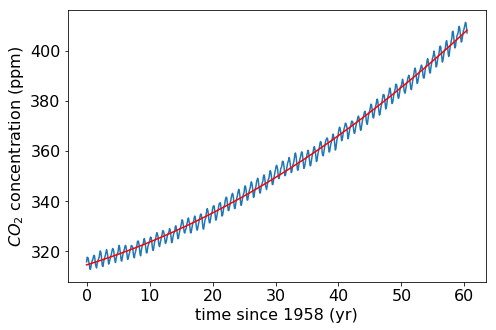

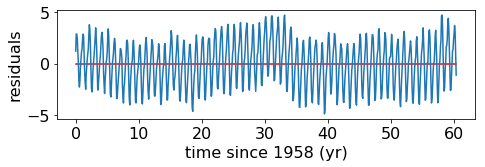

chi-squared = 4.906879019610149
parameters and uncertainties:
p0 = 314.481838 +/- 0.491926
p1 = 0.781446 +/- 0.037610
p2 = 0.012714 +/- 0.000603


In [5]:
# plot the quadratic fit curve
def g(x,p_a,p_b,p_c):                    # quadratic fitting model
    return p_a + p_b*x + p_c*x**2
pp = 3                                # number of parameters

guesses = (1,1,1)   
(p_a,p_b,p_c),cc = curve_fit(g,x,y,p0=guesses,sigma=sig) 
(up0,up1,up2) = 2*sqrt(np.diag(cc)) 

yfit = g(x,p_a,p_b,p_c)
yys = (yfit-y)**2
chisqr = sum(yys)/(nn-pp)              

xmod = np.linspace(x[0],x[-1],100)   
ymod1 = g(xmod,p_a,p_b,p_c)
plt.figure(figsize=(7.5,5))
plt.rc('font', size=16)
plt.plot(x,y) 
plt.plot(xmod,ymod1,'r')                  
plt.xlabel('time since 1958 (yr)')
plt.ylabel('$CO_2$ concentration (ppm)')
plt.show()

# plot the residuals on a separate plot
plt.figure(figsize=(7.5,2))
yzero = 0.0*xmod        
plt.plot(xmod,yzero,'r')  
resid = y-g(x,p_a,p_b,p_c)                  
plt.plot(x,resid) 
plt.xlabel('time since 1958 (yr)')
plt.ylabel('residuals')
plt.show()

# print out chi-squared, parameters and uncertainties
print('chi-squared =',chisqr)
print('parameters and uncertainties:')
print('p0 = %f +/- %f'%(p_a,up0))
print('p1 = %f +/- %f'%(p_b,up1))
print('p2 = %f +/- %f'%(p_c,up2))

The quadratic model does a much better job to fit the data. Its chi-squared value is lower to "4.91", much closer to the expected value of 1 than the linear model does. Also, the residuals from the fit can be considered randomly scattered above and below 0 (the red line) in a smaller range of less than 5 (-5< residual <5).

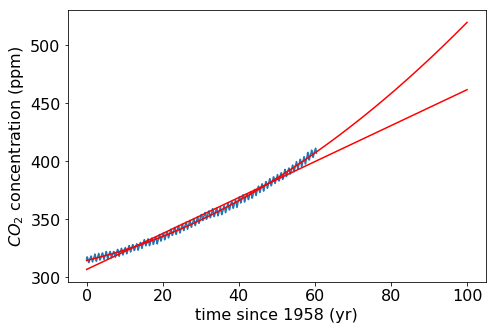

CO2 concentration at t=100 years for linear fit: 461.72 ppm
CO2 concentration at t=100 years for quadratic fit: 519.77 ppm


In [6]:
x1 =[]
for i in range(len(x)):
    x1.append(x[i])
for i in range(int(x[-1]),101):
    x1.append(i)                    # create a new time list x1 that extended to 100 years
plt.figure(figsize=(7.5,5))
plt.rc('font', size=16)
xmod = np.linspace(x1[0],x1[-1],200) 
ymod = f(xmod,p0,p1)
ymod1 = g(xmod,p_a,p_b,p_c)
plt.plot(x,y)                       # plot the data
plt.plot(xmod,ymod,'r')             # plot the linear model
plt.plot(xmod,ymod1,'r')            # plot the quadratic model
plt.xlabel('time since 1958 (yr)')
plt.ylabel('$CO_2$ concentration (ppm)')
plt.show()

print('CO2 concentration at t=100 years for linear fit: %.2f ppm'% ymod[-1])
print('CO2 concentration at t=100 years for quadratic fit: %.2f ppm'% ymod1[-1])                 


From the projection of 100 years since 1958, we can see that the difference in fitting models(linear and quadratic) leads to difference in prediction(about 50 ppm). The value of $CO_2$ concentration in 2058 predicted by the quadratic model, 519.77 ppm, would be more accurate, as the model has a better fit with the original data. Therefore, we should be aware that having a good model for the data is essential to get accurate values and predictions.